In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df = pd.read_csv('Position_Salaries.csv')
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [31]:
#transform y to 2d - array because Standard Scaler needs this format

y= y.reshape(len(y) , 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [32]:
#feature scaling : this model needs it because the equation is implicit
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
x = sc_x.fit_transform(x)

print("x : " , x)
print("y : " , y)


x :  [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
y :  [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [33]:
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
# SVR has Kernel functions we have used RBF - Gaussian Radial Basis Function

model.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [34]:
sc_y.inverse_transform(model.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

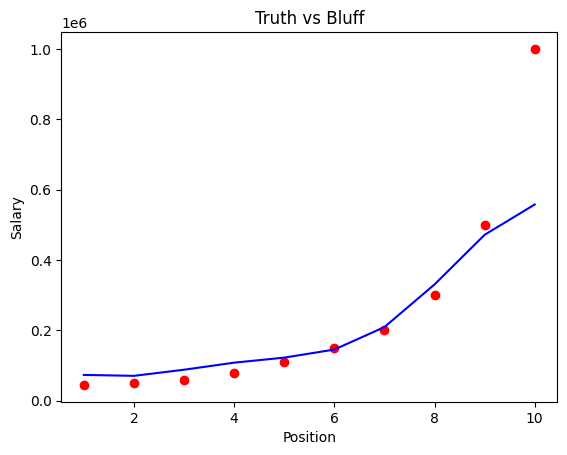

In [36]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y) , color='red')
plt.plot(sc_x.inverse_transform(x) , sc_y.inverse_transform(model.predict(x).reshape(-1,1)) , color='blue' )
plt.title('Truth vs Bluff')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()